In [10]:
!pip install yfinance seaborn scipy --quiet

In [1]:
#패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.optimize import minimize
sns.set()

##데이터 가져오고 수정하기

In [ ]:
#### 4. ETF 유니버스 데이터 처리



#### 최장혁의 포트폴리오 예시

| Ticker | Sector |
| ------ | -----  |
| XLB | 소재 |
| XLE | 에너지 |
| XLF | 금융 |
| XLI | 산업재 |
| XLK | IT |
| XLP | 필수소비재 |
| XLU | 유틸리티 |
| XLV | 헬스케어 |
| XLY | 임의소비재 |
| TLT | 채권       |
| GLD |  금  |


In [4]:
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY','TLT','GLD']
etf = yf.Tickers(tickers)
data = etf.history(start='2010-01-01', actions=False)['Close']
data = data.resample('3M').last()

[*********************100%***********************]  11 of 11 completed


,GLD,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2010-01-04 00:00:00-05:00,109.800003,63.869518,25.599789,38.477596,9.432530,21.969965,19.192492,18.808451,19.625513,25.311987,25.304150
2010-01-05 00:00:00-05:00,109.699997,64.281921,25.682566,38.791626,9.605897,22.047531,19.167746,18.815502,19.391876,25.063744,25.396933
2010-01-06 00:00:00-05:00,111.510002,63.421490,26.119005,39.256176,9.625162,22.094082,18.953316,18.801399,19.505541,25.319992,25.430668
2010-01-07 00:00:00-05:00,110.820000,63.528168,25.915836,39.197285,9.830633,22.334578,18.879089,18.801399,19.417135,25.408068,25.641539
2010-01-08 00:00:00-05:00,111.370003,63.499706,26.277033,39.452457,9.772848,22.691429,19.002802,18.737925,19.398188,25.448109,25.633102
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13 00:00:00-05:00,178.759995,106.750000,83.790001,89.949997,36.119999,102.459999,130.490005,74.739998,71.330002,135.449997,139.699997
2023-01-17 00:00:00-05:00,177.589996,106.059998,82.949997,90.139999,35.880001,101.589996,131.080002,74.790001,71.230003,134.820007,139.800003
2023-01-18 00:00:00-05:00,177.080002,108.629997,81.779999,88.489998,35.209999,99.680000,129.389999,72.750000,69.519997,132.919998,137.979996


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

In [51]:
#데이터가 어떻게 생겼는지 확인해보기 위해 plot graph 만들어보자!
P0 =  data.iloc[0]

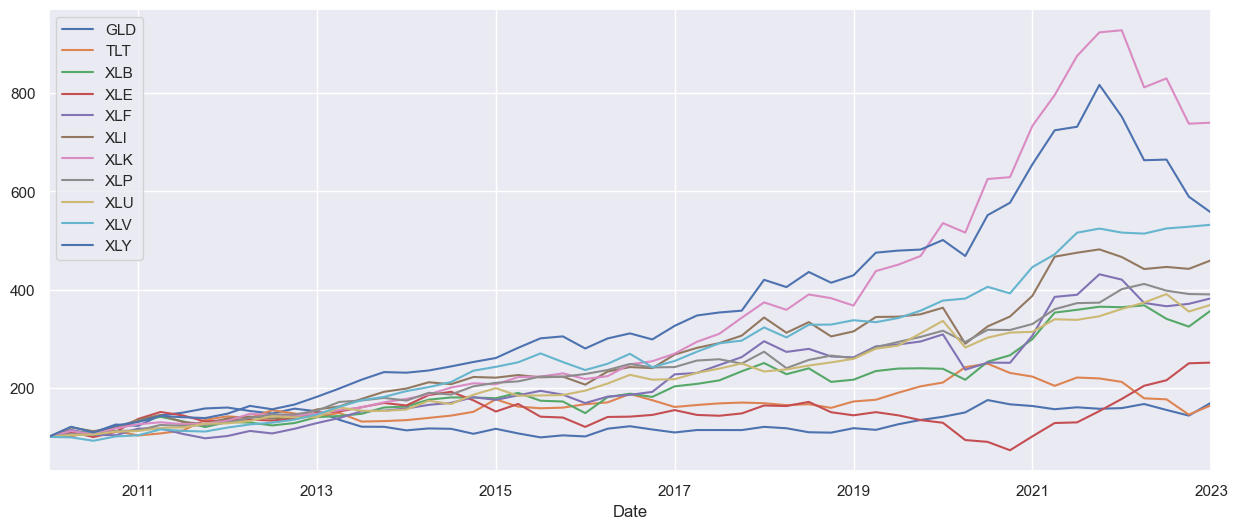

In [35]:
#The idea behind this operation is to compare the behavior of the four different stocks as if they were all starting from the same value = 100
(data / data.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

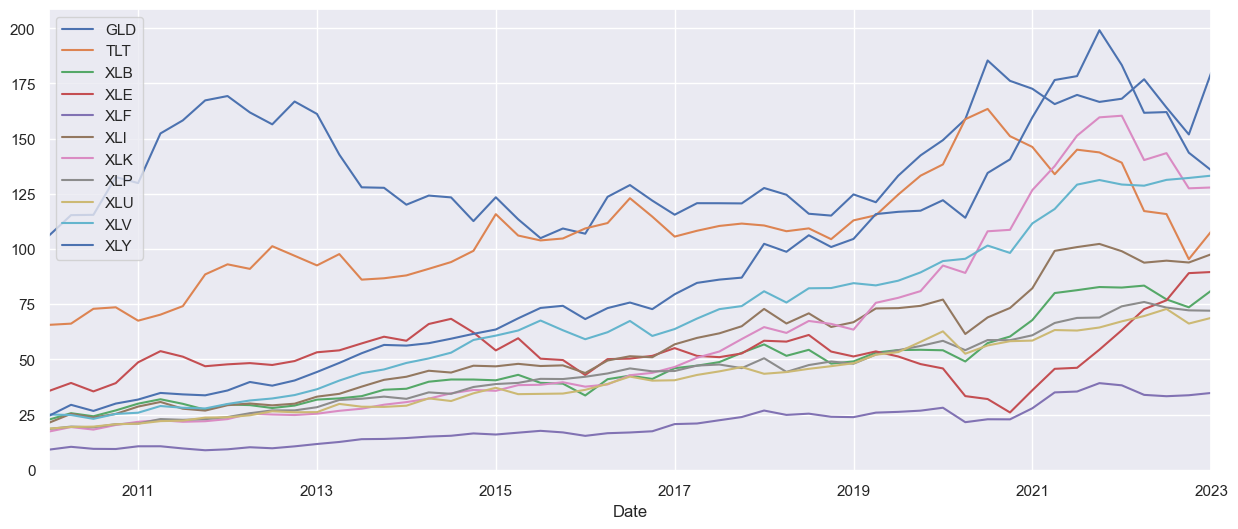

In [36]:
#만약 정규화를 시켜주지 않고 그냥 그래프로 표현한다면?
data.plot(figsize=(15,6))
plt.show()

##포트폴리오 수익률 계산

###Simple rate of return

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [37]:
data

,GLD,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2010-01-31 00:00:00-05:00,105.959999,65.647438,22.680119,35.657688,9.105057,21.240734,17.287277,18.476992,18.646765,25.047737,24.384762
2010-04-30 00:00:00-04:00,115.360001,66.205132,25.632704,39.334538,10.400076,25.353592,19.352894,19.568022,19.392492,24.810209,29.425713
2010-07-31 00:00:00-04:00,115.489998,72.924950,24.246214,35.510391,9.486797,23.694740,18.200779,19.244785,19.551977,23.070929,26.654984
2010-10-31 00:00:00-04:00,132.619995,73.608185,26.895996,39.251633,9.411156,25.301504,20.291559,20.667950,20.630579,25.299925,29.989691
2011-01-31 00:00:00-05:00,129.869995,67.540726,29.950802,48.683792,10.638918,28.639267,21.736095,20.928148,20.877569,25.847271,31.809210
2011-04-30 00:00:00-04:00,152.369995,70.281746,31.949331,53.742477,10.653754,30.717653,22.438910,22.971249,22.040571,28.882812,34.808659
2011-07-31 00:00:00-04:00,158.289993,74.133080,29.879803,51.239582,9.660678,27.663305,21.745232,22.625954,22.271954,28.101906,34.156273
2011-10-31 00:00:00-04:00,167.339996,88.512192,27.225319,46.905651,8.846336,26.807455,21.997118,22.942892,23.638893,27.789646,33.728737
2012-01-31 00:00:00-05:00,169.309998,93.074554,29.587315,47.766392,9.272304,29.248127,22.959772,23.888670,23.787050,29.810745,35.924171


In [38]:
#수익률 계산
rets = data.pct_change().fillna(0)

In [39]:
rets

,GLD,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,
2010-01-31 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-04-30 00:00:00-04:00,0.088713,0.008495,0.130184,0.103115,0.142231,0.193631,0.119488,0.059048,0.039992,-0.009483,0.206725
2010-07-31 00:00:00-04:00,0.001127,0.101500,-0.054091,-0.097221,-0.087815,-0.065429,-0.059532,-0.016519,0.008224,-0.070103,-0.094160
2010-10-31 00:00:00-04:00,0.148325,0.009369,0.109286,0.105356,-0.007973,0.067811,0.114873,0.073951,0.055166,0.096615,0.125106
2011-01-31 00:00:00-05:00,-0.020736,-0.082429,0.113578,0.240300,0.130458,0.131920,0.071189,0.012589,0.011972,0.021634,0.060671
2011-04-30 00:00:00-04:00,0.173250,0.040583,0.066727,0.103909,0.001395,0.072571,0.032334,0.097625,0.055706,0.117441,0.094295
2011-07-31 00:00:00-04:00,0.038853,0.054798,-0.064775,-0.046572,-0.093214,-0.099433,-0.030914,-0.015032,0.010498,-0.027037,-0.018742
2011-10-31 00:00:00-04:00,0.057174,0.193964,-0.088839,-0.084582,-0.084294,-0.030938,0.011584,0.014008,0.061375,-0.011112,-0.012517
2012-01-31 00:00:00-05:00,0.011772,0.051545,0.086757,0.018350,0.048152,0.091045,0.043763,0.041223,0.006268,0.072728,0.065091


##변동성

In [40]:
#색깔 팔레트
pal = sns.color_palette('Spectral',len(tickers))

In [46]:
#가중치 계산 함수
def get_ew_weights(rets):
  noa = len(rets.columns)
  weights = np.ones_like(rets) * (1/noa)
  return weights

weights = get_ew_weights(rets)[-1]
weights

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

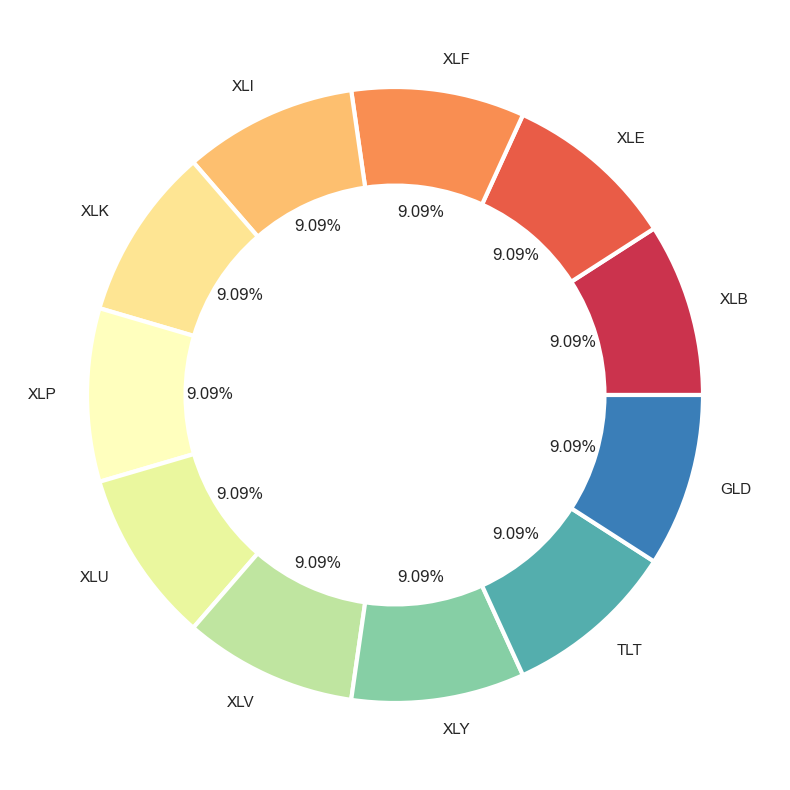

In [47]:
# 파이차트 시각화
plt.figure(figsize=(10, 10))
wedgeprops = {'width': 0.32, 'edgecolor': 'w', 'linewidth': 3}
plt.pie(weights, labels=tickers, autopct='%.2f%%', wedgeprops=wedgeprops, colors=pal)
plt.show()

Text(0, 0.5, 'Weights')

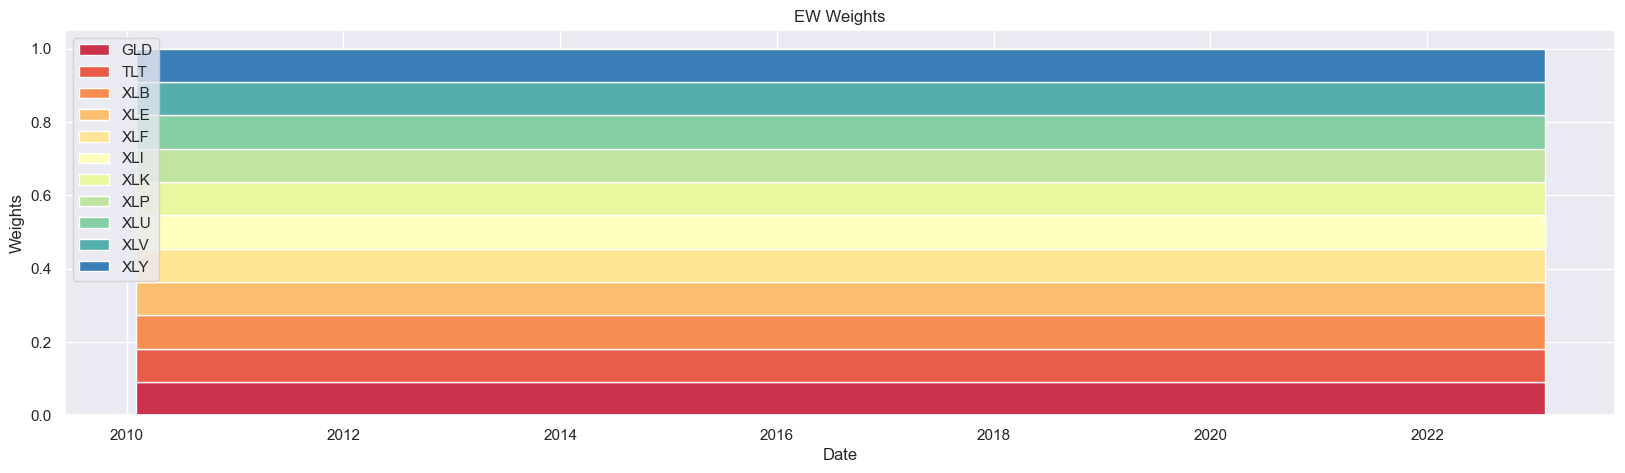

In [48]:
# 시계열 가중치 데이터프레임
ew_w_df = pd.DataFrame(get_ew_weights(rets), index=rets.index, columns=rets.columns)

# 그래프 결과
plt.figure(figsize=(20, 5))
plt.stackplot(ew_w_df.index, ew_w_df.T, labels=ew_w_df.columns, colors=pal)
plt.legend(loc='upper left')
plt.title('EW Weights')
plt.xlabel('Date')
plt.ylabel('Weights')

Text(0, 0.5, 'Returns')

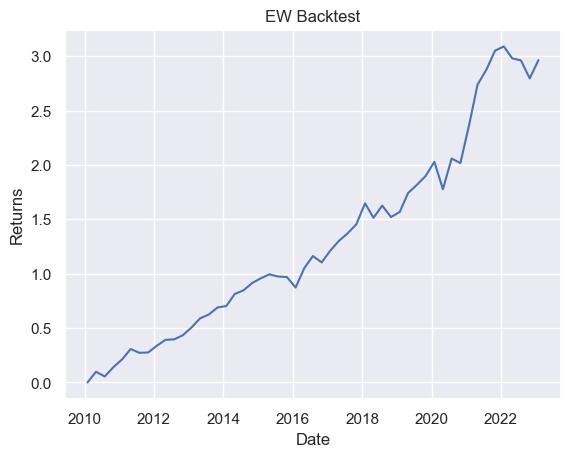

In [49]:
port_rets = rets.mean(axis =1)

# 포트폴리오 누적 수익률
port_cum_rets = (1 + port_rets).cumprod() - 1

# 그래프 결과
plt.plot(port_cum_rets)
plt.title('EW Backtest')
plt.xlabel('Date')
plt.ylabel('Returns')